In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier
from sklearn.metrics import roc_curve

from sklearn.metrics import auc
import matplotlib.pyplot as plt
from xgboost import plot_tree
import pylab as pl
import matplotlib.pyplot as plt
from scipy.stats import sem
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score


from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
#from keras.layers.convolutional import Conv2D
#from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.layers.recurrent import LSTM
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from keras.models import load_model
import pandas as pd
import numpy as np
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from os import listdir
from sklearn.metrics import roc_curve

from sklearn.metrics import auc

from scipy.stats import sem
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score

D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:
test_data_folder = "data/data/test_data/test_data"
ground_truth_folder = "data/data/labels"
image_folder = "data/data/imgs"

In [3]:
def get_train_test(data):
    #train_features_18 = train_data[[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]
    test_features_18 = data[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]
    #print(train_data.shape)
    print(test_features_18.shape)
    return test_features_18

In [4]:
def get_train_test_lstm(data):
    #train_data = data[data[0]<max_id]
    #test_data = data[data[0]>=max(max_id,500)]
    #print(train_data.shape)
    #print(test_data.shape)
    #train_features = train_data.iloc[:,22:622]
    test_features = data.iloc[:,18:]
    test_features_18 = data[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]
    test_features_arr = test_features.as_matrix()
    test_features_reshaped = test_features_arr.reshape(data.shape[0],60,10)
    #print(train_features_reshaped.shape)
    print(test_features_reshaped.shape)
    return test_features_reshaped, test_features_18

### Subject 115 Slice 24

In [80]:
test_data = pd.read_csv(test_data_folder + "/115-test-slice24.csv", header = None)

In [81]:
test_data.shape

(65536, 618)

In [82]:
ground_truth = pd.read_csv(ground_truth_folder + "/115-test-slice24-label.csv",  header = None).as_matrix()
ground_truth[2][0]
ground_truth.shape

(65536, 1)

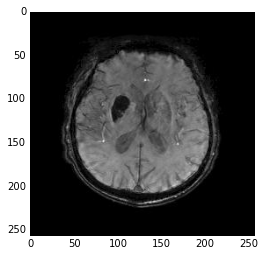

In [83]:
#import matplotlib.image as mpimg
img=plt.imread(image_folder + '/115_original_slice_24.jpg')
plt.imshow(img,cmap = "gray")

In [84]:
heat_map_groundtruth = np.dstack([img,img,img])

c = 0
for i in range(256):
    for j in range(256):
        try:
            if ground_truth[c][0] == 1:
                heat_map_groundtruth[256 - j,i] = [255,0,0]
        except IndexError:
            print(c)
        c+=1


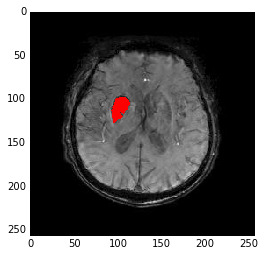

In [85]:
plt.imshow(heat_map_groundtruth, interpolation = "nearest")

#### Predictions best Xgboost Full Features

D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


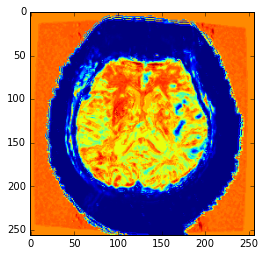

In [86]:
import _pickle as pickle
model = pickle.load(open('best_xgboost_model.pickle', 'rb'))
test_preds = model.predict(test_data.as_matrix())
test_preds_probs = model.predict_proba(test_data.as_matrix())
heatmap_predicted = test_preds_probs[:,1]
heatmap_predicted = heatmap_predicted.reshape(256,256)
plt.imshow(np.rot90(heatmap_predicted))

#### Predictions best Xgboost 18 Features

(65536, 18)


D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


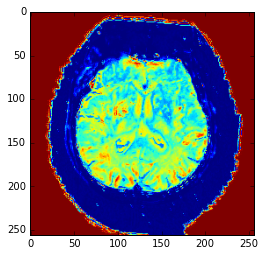

In [88]:
test_features = get_train_test(test_data)
test_features = test_features.as_matrix()
model = pickle.load(open('best_xgboost_18_model.pickle', 'rb'))
test_preds = model.predict(test_features)
test_preds_probs = model.predict_proba(test_features)
heat_map_prediction = test_preds_probs[:,1].reshape(256,256)
plt.imshow(np.rot90(heat_map_prediction))

#### Predictions from Decision Tree Full Features

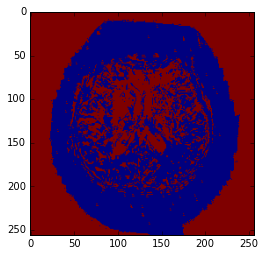

In [91]:
model = pickle.load(open('best_dtree_model.pickle', 'rb'))
test_preds = model.predict(test_data.as_matrix())
test_preds_probs = model.predict_proba(test_data.as_matrix())
heatmap_predicted = test_preds_probs[:,1]
heatmap_predicted = heatmap_predicted.reshape(256,256)
plt.imshow(np.rot90(heatmap_predicted))

#### predictions best Dtree model 18 features

(65536, 18)


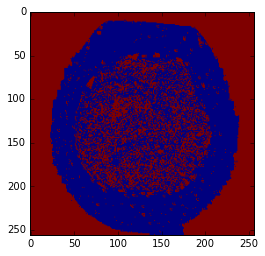

In [92]:
test_features = get_train_test(test_data)
test_features = test_features.as_matrix()
model = pickle.load(open('best_dtree_18_model.pickle', 'rb'))
test_preds = model.predict(test_features)
test_preds_probs = model.predict_proba(test_features)
heat_map_prediction = test_preds_probs[:,1].reshape(256,256)
plt.imshow(np.rot90(heat_map_prediction))

#### Multi input LSTM models prediction

In [13]:
def get_hot_value(my_list):
    max_val = max(my_list)
    return [int(item == max_val) for item in my_list]
def test_lstm_multi(test_features_reshaped,test_features_18, test_labels, pickle_name):
    
    model = load_model(pickle_name)
    
    #X = test_features
    y = np.array(test_labels)
    #le = preprocessing.LabelEncoder()
    #y = le.fit_transform(y)

    y = y.reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    y = ohe.fit_transform(y)
    
    #Evaluate the model
    scores = model.evaluate([test_features_18,test_features_reshaped], y, verbose=1)
    predicted_labels = model.predict([test_features_18,test_features_reshaped])

    print("Accuracy: ", scores[1]*100)

    hot_list = [get_hot_value(sublist) for sublist in predicted_labels]

    #t  = np.array(y)
    #p  = np.array(hot_list)
    #t = np.argmax(t, axis=1)
    #p = np.argmax(p, axis=1)

    #print("Precision: ", precision_score(t, p, average=None))
    
    return hot_list, ohe, predicted_labels

In [32]:
print(models_60cells)

['19678_weights.best.hdf5', '27461_weights.best.hdf5', '29835_weights.best.hdf5', '37210_weights.best.hdf5', '42507_weights.best.hdf5', '42920_weights.best_60cells.hdf5', '47512_weights.best.hdf5', '48850_weights.best.hdf5']


37210
37210_weights.best.hdf5
(65536, 60, 10)
65536/65536 [==============================] - 66s 1ms/step
Accuracy:  85.46905517578125


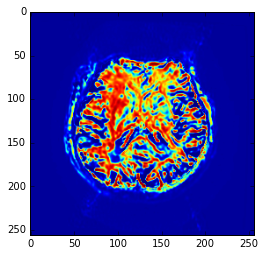

In [93]:
model_folder_60cells = 'multi_input_models_60cells/'
models_60cells = listdir(model_folder_60cells)
#plt.figure(figsize = (10,6))
#plt.title("Training Data Vs AUC for 60 LSTM cells and Multi input model")
#plt.xlabel("FPR")
#plt.ylabel("TPR")
max_ids = [200,300,350,400,450,500]
k = 0
for model in ['37210_weights.best.hdf5']:
    train_data_size = int(model[:5])
    print(train_data_size)
    #max_id = max_ids[k]
    j+=1
    print(model)
    test_features_reshaped, test_features_18 = get_train_test_lstm(test_data)
    lstm_predicted_labels,ohe,predicted_probs = test_lstm_multi(test_features_reshaped, test_features_18,ground_truth,model_folder_60cells+model)
    heat_map_prediction = predicted_probs[:,1]
    heat_map_prediction = heat_map_prediction.reshape(256,256)
    plt.imshow(np.rot90(heat_map_prediction))

37210
37210_weights.best_10cells.hdf5
(65536, 60, 10)
65536/65536 [==============================] - 56s 856us/step
Accuracy:  95.09429931640625


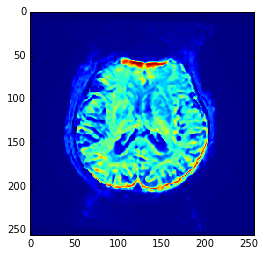

In [97]:
model_folder_10cells = 'multi_input_models_10cells/'
#models_60cells = listdir(model_folder_60cells)
#plt.figure(figsize = (10,6))
#plt.title("Training Data Vs AUC for 60 LSTM cells and Multi input model")
#plt.xlabel("FPR")
#plt.ylabel("TPR")
max_ids = [200,300,350,400,450,500]
k = 0
for model in ['37210_weights.best_10cells.hdf5']:
    train_data_size = int(model[:5])
    print(train_data_size)
    #max_id = max_ids[k]
    j+=1
    print(model)
    test_features_reshaped, test_features_18 = get_train_test_lstm(test_data)
    lstm_predicted_labels,ohe,predicted_probs = test_lstm_multi(test_features_reshaped, test_features_18,ground_truth,model_folder_10cells+model)
    heat_map_prediction = predicted_probs[:,1]
    heat_map_prediction = heat_map_prediction.reshape(256,256)
    plt.imshow(np.rot90(heat_map_prediction), interpolation = 'nearest')

### Subject 240 Slice 32

In [54]:
test_data = pd.read_csv(test_data_folder + "/240-test-slice32.csv", header = None)

In [55]:
test_data.shape

(65536, 618)

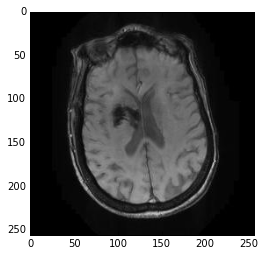

In [56]:
ground_truth = pd.read_csv(ground_truth_folder + "/240-test-slice32-label.csv",  header = None).as_matrix()
img=plt.imread(image_folder + '/240_original_slice_32.jpg')
plt.imshow(img,cmap = "gray")

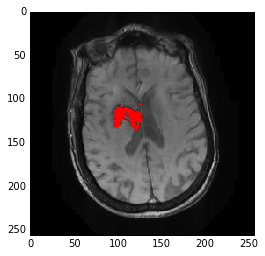

In [70]:
heat_map_groundtruth = np.dstack([img,img,img])

c = 0
for i in range(256):
    for j in range(256):
        try:
            if ground_truth[c][0] == 1:
                heat_map_groundtruth[256-j,i] = [255,0,0]
        except IndexError:
            print(c)
        c+=1
plt.imshow(heat_map_groundtruth, interpolation = "nearest")

#### XGBoost full model

In [71]:
model = pickle.load(open('best_xgboost_model.pickle', 'rb'))
test_preds = model.predict(test_data.as_matrix())
test_preds_probs = model.predict_proba(test_data.as_matrix())


D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


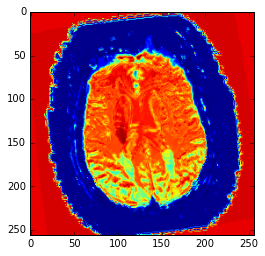

In [72]:
heatmap_predicted = test_preds_probs[:,1]
heatmap_predicted = heatmap_predicted.reshape(256,256)
plt.imshow(np.rot90(heatmap_predicted))

#### Dtree Model Full

In [73]:
model = pickle.load(open('best_dtree_model.pickle', 'rb'))
test_preds = model.predict(test_data.as_matrix())
test_preds_probs = model.predict_proba(test_data.as_matrix())


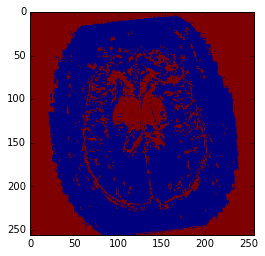

In [77]:
heatmap_predicted = test_preds_probs[:,1]
heatmap_predicted = heatmap_predicted.reshape(256,256)
plt.imshow(np.rot90(heatmap_predicted))

#### Xgboost 18 feats model

(65536, 18)


D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


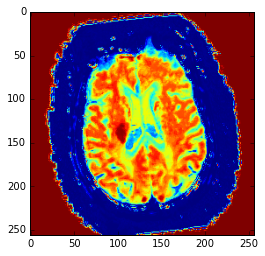

In [78]:
test_features = get_train_test(test_data)
test_features = test_features.as_matrix()
model = pickle.load(open('best_xgboost_18_model.pickle', 'rb'))
test_preds = model.predict(test_features)
test_preds_probs = model.predict_proba(test_features)

heat_map_prediction = test_preds_probs[:,1]

heat_map_prediction = heat_map_prediction.reshape(256,256)

plt.imshow(np.rot90(heat_map_prediction))

#### Dtree 18 feats

(65536, 18)


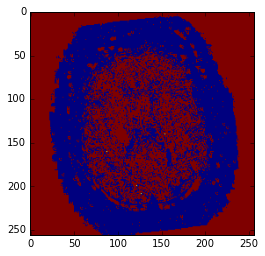

In [79]:
test_features = get_train_test(test_data)
test_features = test_features.as_matrix()
model = pickle.load(open('best_dtree_18_model.pickle', 'rb'))
test_preds = model.predict(test_features)
test_preds_probs = model.predict_proba(test_features)

heat_map_prediction = test_preds_probs[:,1]

heat_map_prediction = heat_map_prediction.reshape(256,256)

plt.imshow(np.rot90(heat_map_prediction))

#### LSTM Models

48850
48850_weights.best.hdf5
(65536, 60, 10)
65536/65536 [==============================] - ETA:  - 62s 953us/step
Accuracy:  70.37506103515625


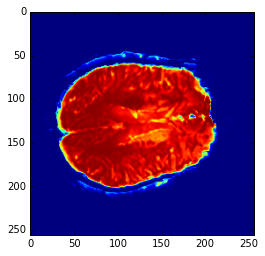

In [68]:
model_folder_60cells = 'multi_input_models_60cells/'
models_60cells = listdir(model_folder_60cells)
#plt.figure(figsize = (10,6))
#plt.title("Training Data Vs AUC for 60 LSTM cells and Multi input model")
#plt.xlabel("FPR")
#plt.ylabel("TPR")
max_ids = [200,300,350,400,450,500]
k = 0
for model in ['48850_weights.best.hdf5']:
    train_data_size = int(model[:5])
    print(train_data_size)
    #max_id = max_ids[k]
    j+=1
    print(model)
    test_features_reshaped, test_features_18 = get_train_test_lstm(test_data)
    lstm_predicted_labels,ohe,predicted_probs = test_lstm_multi(test_features_reshaped, test_features_18,ground_truth,model_folder_60cells+model)
    heat_map_prediction = predicted_probs[:,1]
    heat_map_prediction = heat_map_prediction.reshape(256,256)
    plt.imshow(np.rot90(heat_map_prediction))

### Subject 155 Slice 18

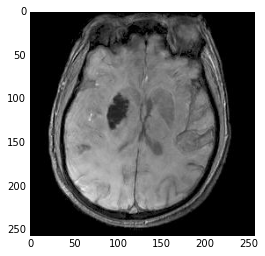

In [5]:
test_data = pd.read_csv(test_data_folder + "/371-test-slice24.csv", header = None)
ground_truth = pd.read_csv(ground_truth_folder + "/371-test-slice24-label.csv",  header = None).as_matrix()
img=plt.imread(image_folder + '/371_original_slice_24.jpg')
plt.imshow(img,cmap = "gray")

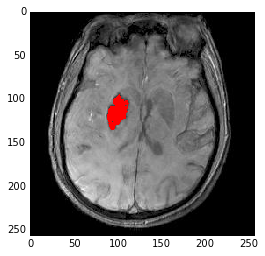

In [15]:
heat_map_groundtruth = np.dstack([img,img,img])

c = 0
for i in range(256):
    for j in range(256):
        try:
            if ground_truth[c][0] == 1:
                heat_map_groundtruth[256-j,i] = [255,0,0]
        except IndexError:
            print(c)
        c+=1
plt.imshow(heat_map_groundtruth, interpolation = "nearest")
plt.savefig('Result_Images/heatmap_GRE.png', dpi = 1200)

#### Xgboost full feats

D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


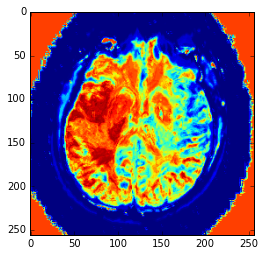

In [16]:
import _pickle as pickle
model = pickle.load(open('best_xgboost_model.pickle', 'rb'))
test_preds = model.predict(test_data.as_matrix())
test_preds_probs = model.predict_proba(test_data.as_matrix())
heatmap_predicted = test_preds_probs[:,1]
heatmap_predicted = heatmap_predicted.reshape(256,256)
plt.imshow(np.rot90(heatmap_predicted))
plt.savefig('Result_Images/xgboost_full.png', dpi = 1200)

(65536, 18)


D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


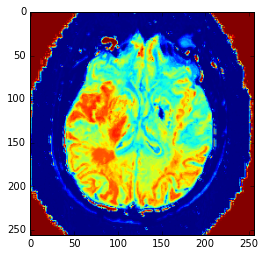

In [17]:
test_features = get_train_test(test_data)
test_features = test_features.as_matrix()
model = pickle.load(open('best_xgboost_18_model.pickle', 'rb'))
test_preds = model.predict(test_features)
test_preds_probs = model.predict_proba(test_features)

heat_map_prediction = test_preds_probs[:,1]

heat_map_prediction = heat_map_prediction.reshape(256,256)

plt.imshow(np.rot90(heat_map_prediction))
plt.savefig('Result_Images/xgboost_18.png', dpi = 1200)

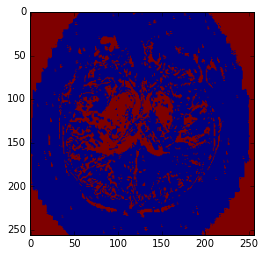

In [18]:
model = pickle.load(open('best_dtree_model.pickle', 'rb'))
test_preds = model.predict(test_data.as_matrix())
test_preds_probs = model.predict_proba(test_data.as_matrix())
heatmap_predicted = test_preds_probs[:,1]
heatmap_predicted = heatmap_predicted.reshape(256,256)
plt.imshow(np.rot90(heatmap_predicted))
plt.savefig('Result_Images/dtree_full.png', dpi = 1200)

(65536, 18)


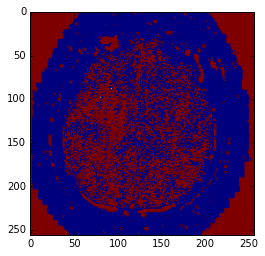

In [19]:
test_features = get_train_test(test_data)
test_features = test_features.as_matrix()
model = pickle.load(open('best_dtree_18_model.pickle', 'rb'))
test_preds = model.predict(test_features)
test_preds_probs = model.predict_proba(test_features)

heat_map_prediction = test_preds_probs[:,1]

heat_map_prediction = heat_map_prediction.reshape(256,256)

plt.imshow(np.rot90(heat_map_prediction))
plt.savefig('Result_Images/dtree_18.png', dpi = 1200)

37210
37210_weights.best.hdf5
(65536, 60, 10)
65536/65536 [==============================] - 55s 846us/step
Accuracy:  85.53466796875


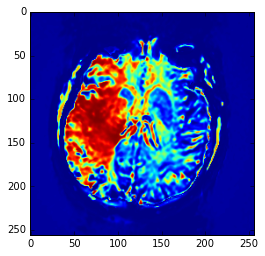

In [20]:
model_folder_60cells = 'multi_input_models_60cells/'
models_60cells = listdir(model_folder_60cells)
#plt.figure(figsize = (10,6))
#plt.title("Training Data Vs AUC for 60 LSTM cells and Multi input model")
#plt.xlabel("FPR")
#plt.ylabel("TPR")
max_ids = [200,300,350,400,450,500]
k = 0
for model in ['37210_weights.best.hdf5']:
    train_data_size = int(model[:5])
    print(train_data_size)
    #max_id = max_ids[k]
    j+=1
    print(model)
    test_features_reshaped, test_features_18 = get_train_test_lstm(test_data)
    lstm_predicted_labels,ohe,predicted_probs = test_lstm_multi(test_features_reshaped, test_features_18,ground_truth,model_folder_60cells+model)
    heat_map_prediction = predicted_probs[:,1]
    heat_map_prediction = heat_map_prediction.reshape(256,256)
    plt.imshow(np.rot90(heat_map_prediction))
    plt.savefig('Result_Images/lstm_multi.png', dpi = 1200)